In [30]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle


In [31]:
data = pd.read_csv("/Users/king/GitHub/IoT_ver/Train_Test_IoT_Garage_Door.csv")
for i in range(10):
    data = shuffle(data)
#ts=date+time所以不需要
data.pop("date")
data.pop("time")
#取代空格
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
"""
data["door_state"] = [i.replace(" ","") for i in data['door_state']]
data["sphone_signal"] = [i.replace(" ","") for i in data['sphone_signal']]"""
#labeling
data['door_state'] = data['door_state'].map({"closed":0,"open":1})
data['sphone_signal'] = data["sphone_signal"].map({"false":0,"true":1,"0":0 ,"1":1})

#ts正規化
# 創建 StandardScaler 物件
scaler = StandardScaler()
data["ts"]=scaler.fit_transform(data["ts"].values.reshape(-1, 1))
data['type'] = data['type'].map({"backdoor":0,"ddos":1,"injection":2,"normal":3,"password":4,"ransomware":5,"scanning":6,"xss":7})


#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]

train_data = data.values
test_data = data.values
#前4列的資料進行訓練
X_train = train_data[:,0:4]
X_train=X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,4:]
Y_train= Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:4]
X_test=X_test.astype(float)
#第5列之後為訓練目標變量
Y_test = test_data[:,4:].flatten() 
Y_test=Y_test.astype(float)

print(data)


             ts  door_state  sphone_signal  label  type
0      1.096115           0              0      1     1
1      1.096120           0              0      1     1
2      1.096124           0              0      1     1
3      1.096129           0              0      1     1
4      1.096138           0              0      1     1
...         ...         ...            ...    ...   ...
59582 -0.748184           0              0      0     3
59583 -0.748184           1              1      0     3
59584 -0.748184           0              0      0     3
59585 -0.748184           0              0      0     3
59586 -0.748184           0              0      0     3

[59587 rows x 5 columns]


In [56]:
data.head(10)

,ts,door_state,sphone_signal,label,type
0,1.096115,0,0,1,1
1,1.096120,0,0,1,1
2,1.096124,0,0,1,1
3,1.096129,0,0,1,1
4,1.096138,0,0,1,1
5,1.096142,0,0,1,1
6,1.096147,0,0,1,1
7,1.096152,1,1,1,1
8,1.096156,0,0,1,1
9,1.096161,0,0,1,1


In [45]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train,Y_train)

/Users/king/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [46]:
# 預測成功的比例
print('訓練集: ',knnModel.score(X_train,Y_train))
print('測試集: ',knnModel.score(X_test,Y_test))

訓練集:  1.0
測試集:  1.0


In [47]:
knnModel.fit(X_train,Y_train)
predicted= knnModel.predict(X_train)

/Users/king/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [48]:
print('R2 score: ', knnModel.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('MSE score: ', mse)
knn_model = KNeighborsClassifier(n_neighbors = 10, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1)
accuracy = cross_val_score(knn_model, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print(accuracy.mean()*100,'%')

R2 score:  1.0
MSE score:  0.0
[0.99077026 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
99.90770263467024 %


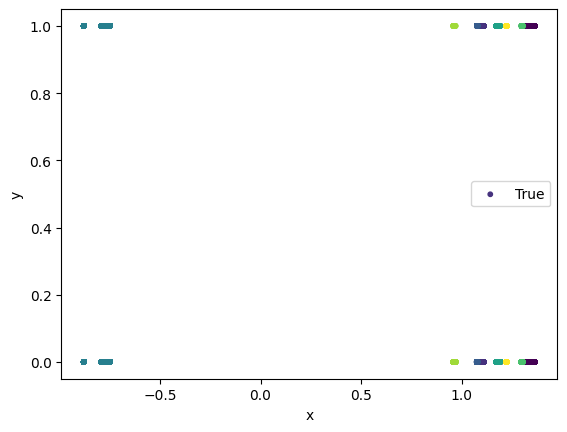

In [49]:
plt.scatter(X_train[:,0], X_train[:, 1], c=, s=10, label='True')
#plt.scatter(predicted.shape[0], predicted.shape[1], s=10, color="r", label='Predicted')
#plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

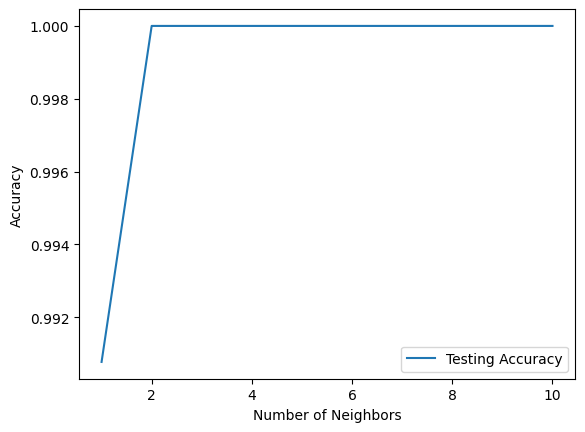

In [51]:
no_neighbors = np.arange(1, 11)
plt.plot(no_neighbors, accuracy, label = 'Testing Accuracy')
#plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()